# Eyes on the Ball

### Install Vertex AI SDK for Python


In [2]:
! pip3 install --upgrade --user google-cloud-aiplatform

### Install openCV python

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Import libraries


In [7]:
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    Image,
    Part,
)

## Use the Gemini 1.0 Pro Vision model

Gemini 1.0 Pro Vision (`gemini-1.0-pro-vision`) is a multimodal model that supports multimodal prompts. You can include text, image(s), and video in your prompt requests and get text or code responses.


### Load the Gemini 1.0 Pro Vision model


In [8]:
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

### Define helper functions

Define helper functions to load and display images.


In [9]:
import http.client
import typing
import urllib.request
import cv2

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def add_bounding_box(path, boundingBox):
    image = cv2.imread(path)
    x1, y1, x2, y2 = boundingBox
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Save the image with bounding box drawn
    cv2.imwrite("image_with_bbox.jpg", image)
    image = Image.load_from_file("image_with_bbox.jpg")
    print("Image with Bounding box:")
    display_images([image])
    

def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def get_url_from_gcs(gcs_uri: str) -> str:
    # converts gcs uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(
        " ", "%20"
    )
    return url


def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

### Have Gemini tell us the elevation of the ball



#### Example 1

-------Prompt--------


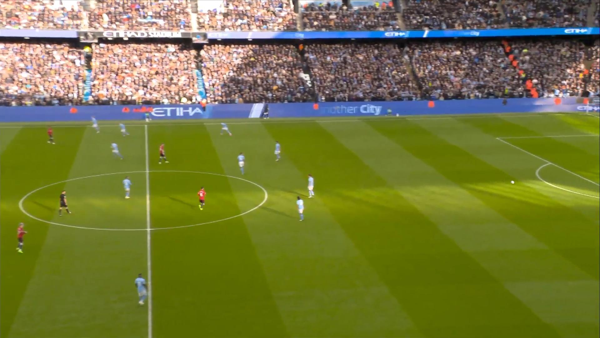

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation

-------Response--------
 {'Class': 0}

In [10]:
image = Image.load_from_file("g5465177-fullhd_mp4-0004_jpg.rf.4ec0d9656de2d984acbfd8839e05c1ee.jpg")

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation"
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

#### Example 2

-------Prompt--------


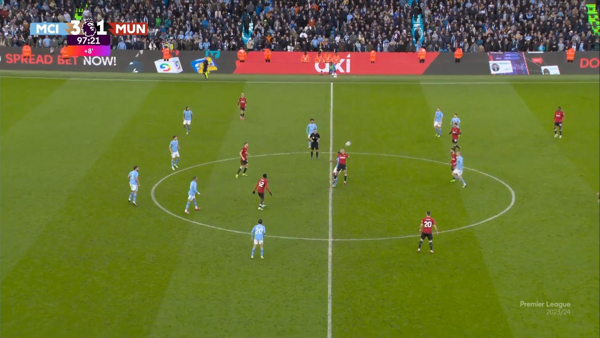

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation

-------Response--------
 {'Class': 1}

In [11]:
image = Image.load_from_file("g5465177-fullhd_mp4-6069_jpg.rf.166983b528da7daa282e88a36f47f452.jpg")

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation"
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

#### Example 3

-------Prompt--------


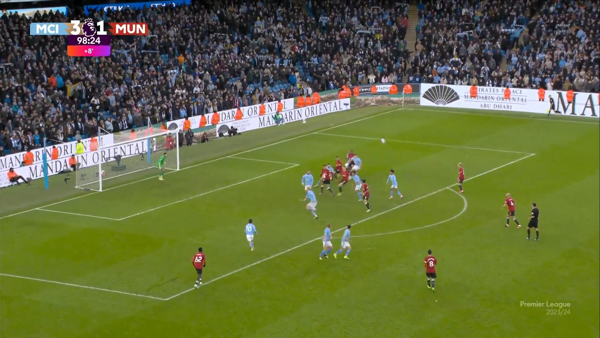

Please tell me whether the ball in the image is on the ground, in mid elevation (could be kicked by a player) or high elevation (Above head height). Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation (could be kicked by a player) or 2 if in high elevation (Above head height)

-------Response--------
 {'Class': 1}

In [12]:
image = Image.load_from_file("g5465177-fullhd_mp4-6132_jpg.rf.2ed0ccc7f0162c715f60ffb8df8654e8.jpg")

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation (could be kicked by a player) or high elevation (Above head height). Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation (could be kicked by a player) or 2 if in high elevation (Above head height)"
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

#### Example 4

-------Prompt--------


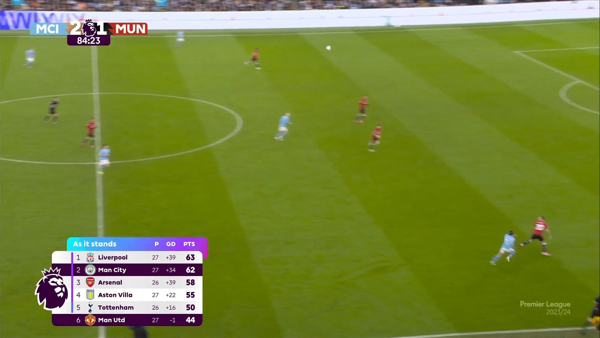

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation

-------Response--------
 {'Class': 0}

In [13]:
image = Image.load_from_file("g5465177-fullhd_mp4-5291_jpg.rf.02bf80f9f1cdc9405287ae3127f7d038.jpg")

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation"
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

#### Example 5

I have added more information to the prompt provided here

-------Prompt--------


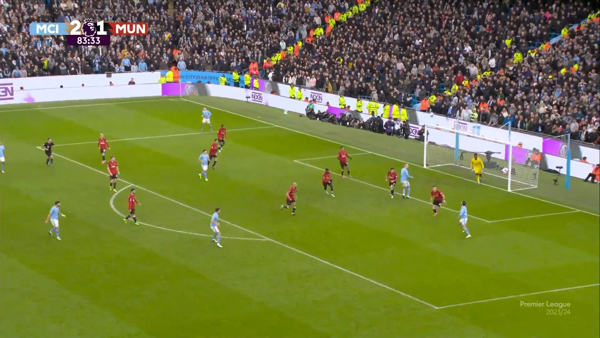

Please tell me whether the ball in the image is on the ground, in mid elevation (could be kicked by a player) or high elevation (Above head height). Please provide your response like this {'Class: } where the class is 0 if on the ground, 1 if in mid elevation (could be kicked by a player) or 2 if in high elevation (Above head height)

-------Response--------
 {'Class: 0}

In [25]:
image = Image.load_from_file("g5465177-fullhd_mp4-5241_jpg.rf.4f078be0954f2dd87bb3c7bc74b4c8df.jpg")

prompt = prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation (could be kicked by a player) or high elevation (Above head height). Please provide your response like this {'Class: } where the class is 0 if on the ground, 1 if in mid elevation (could be kicked by a player) or 2 if in high elevation (Above head height)"
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

### Bounding Boxes?

Seemingly it's not great at generating bounding boxes :(


-------Prompt--------


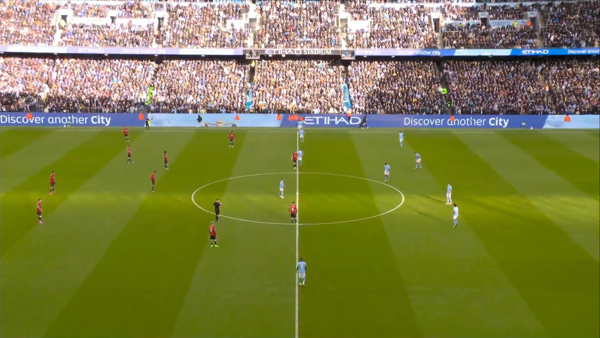

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please give the bounding box aswell.

-------Response--------
 {'Class': 0, 'BoundingBox': [440, 290, 500, 330]}
Image with Bounding box:


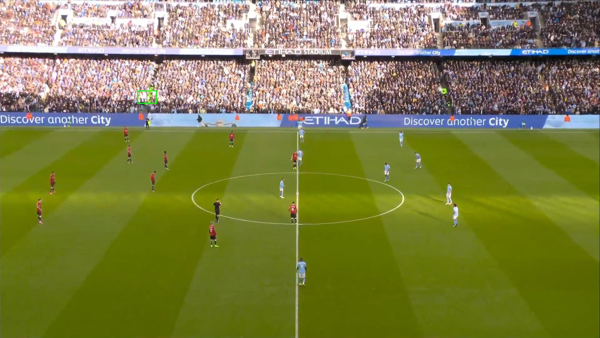

In [16]:
path = "g5465177-fullhd_mp4-0001_jpg.rf.4472f3053d5c37c54840d42aae296f8e.jpg"
image = Image.load_from_file(path)

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please give the bounding box aswell."
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text)
    # Extracting bounding box coordinates
    bbox_str = response.text
    bbox_start = bbox_str.find("[") + 1
    bbox_end = bbox_str.find("]")
    bbox_coords = bbox_str[bbox_start:bbox_end].split(", ")

    # Convert coordinates to integers
    bbox_coords = [int(coord) for coord in bbox_coords]
    add_bounding_box(path, bbox_coords)
    

-------Prompt--------


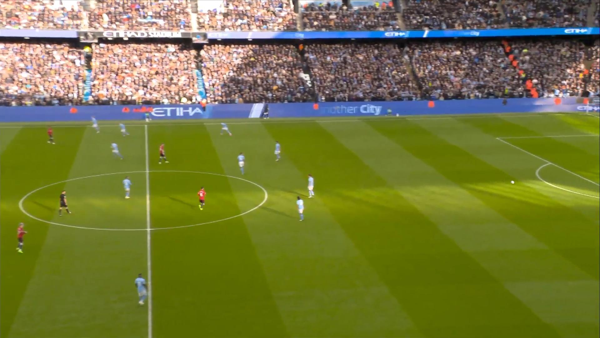

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please give the bounding box aswell. Please draw the box on the image

-------Response--------
 {'Class': 0, 'BoundingBox': [445, 300, 515, 370]}
Image with Bounding box:


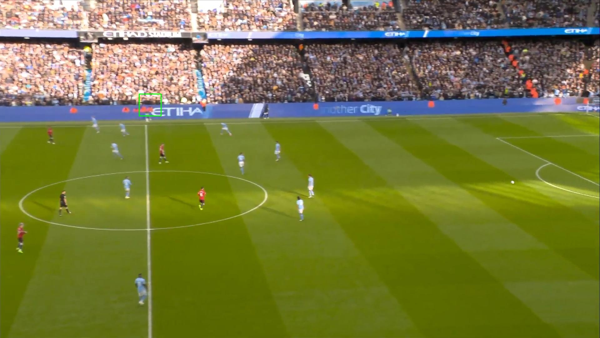

In [22]:
path = "g5465177-fullhd_mp4-0004_jpg.rf.4ec0d9656de2d984acbfd8839e05c1ee.jpg"
image = Image.load_from_file(path)

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please give the bounding box aswell. Please draw the box on the image"
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text)
    # Extracting bounding box coordinates
    bbox_str = response.text
    bbox_start = bbox_str.find("[") + 1
    bbox_end = bbox_str.find("]")
    bbox_coords = bbox_str[bbox_start:bbox_end].split(", ")

    # Convert coordinates to integers
    bbox_coords = [int(coord) for coord in bbox_coords]
    add_bounding_box(path, bbox_coords)
    

-------Prompt--------


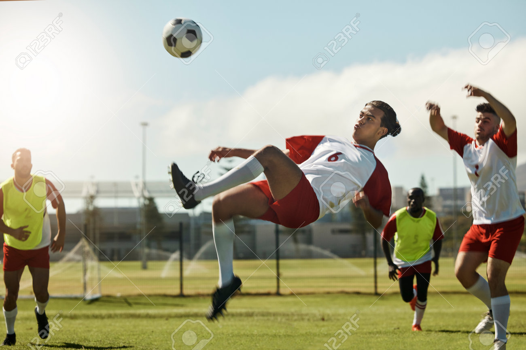

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please give me the bounding box.

-------Response--------
 {'Class': 2}
[443, 334, 523, 401]
Image with Bounding box:


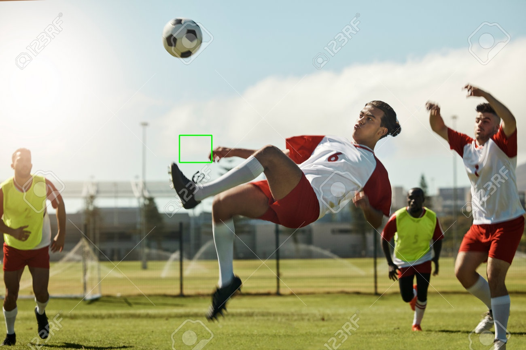

In [33]:
path = "192926625-soccer-team-man-and-ball-kick-in-air-during-football-match-competition-or-training-sports-fitness.jpg"
image = Image.load_from_file(path)

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please give me the bounding box."
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text)
    # Extracting bounding box coordinates
    bbox_str = response.text
    bbox_start = bbox_str.find("[") + 1
    bbox_end = bbox_str.find("]")
    bbox_coords = bbox_str[bbox_start:bbox_end].split(", ")

    # Convert coordinates to integers
    bbox_coords = [int(coord) for coord in bbox_coords]
    add_bounding_box(path, bbox_coords)
    

-------Prompt--------


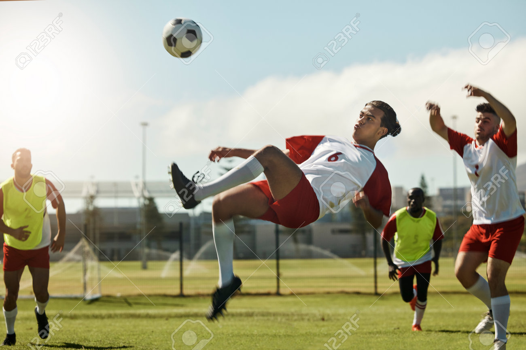

Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please tell me where the ball is in the image, e.g upper left, lower right etc.

-------Response--------
 {'Class': 2, 'Location': upper middle}


In [31]:
path = "192926625-soccer-team-man-and-ball-kick-in-air-during-football-match-competition-or-training-sports-fitness.jpg"
image = Image.load_from_file(path)

prompt = "Please tell me whether the ball in the image is on the ground, in mid elevation or high elevation. Please provide your response like this {'Class': } where the class is 0 if on the ground, 1 if in mid elevation or 2 if in high elevation. Please tell me where the ball is in the image, e.g upper left, lower right etc."
contents = [image, prompt]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text)
    # Extracting bounding box coordinates
#     bbox_str = response.text
#     bbox_start = bbox_str.find("[") + 1
#     bbox_end = bbox_str.find("]")
#     bbox_coords = bbox_str[bbox_start:bbox_end].split(", ")

#     # Convert coordinates to integers
#     bbox_coords = [int(coord) for coord in bbox_coords]
#     add_bounding_box(path, bbox_coords)
    